<h1>✨ Simple Multiple Linear Regression with Numpy ✨</h1> 

In [189]:
import pandas as pd

# Datasaet Source : https://www.kaggle.com/datasets/abrambeyer/openintro-possum

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/possum.csv')
dataset.head(3)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [190]:
# Preprocessing with remove the rows that contain Nan/Null value
# Another option : instead of remove the rows, you can replace the nan with mean, max, or min value

print("Before Cleaning :", dataset.isnull().values.any())
df = dataset.dropna()
print("After Cleaning :", df.isnull().values.any())

df.loc['totlngth'] = df['totlngth'].apply(lambda x: x*10)
print(df.head(3))

Before Cleaning : True
After Cleaning : False
   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0   1.0   1.0  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1   2.0   1.0  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2   3.0   1.0  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


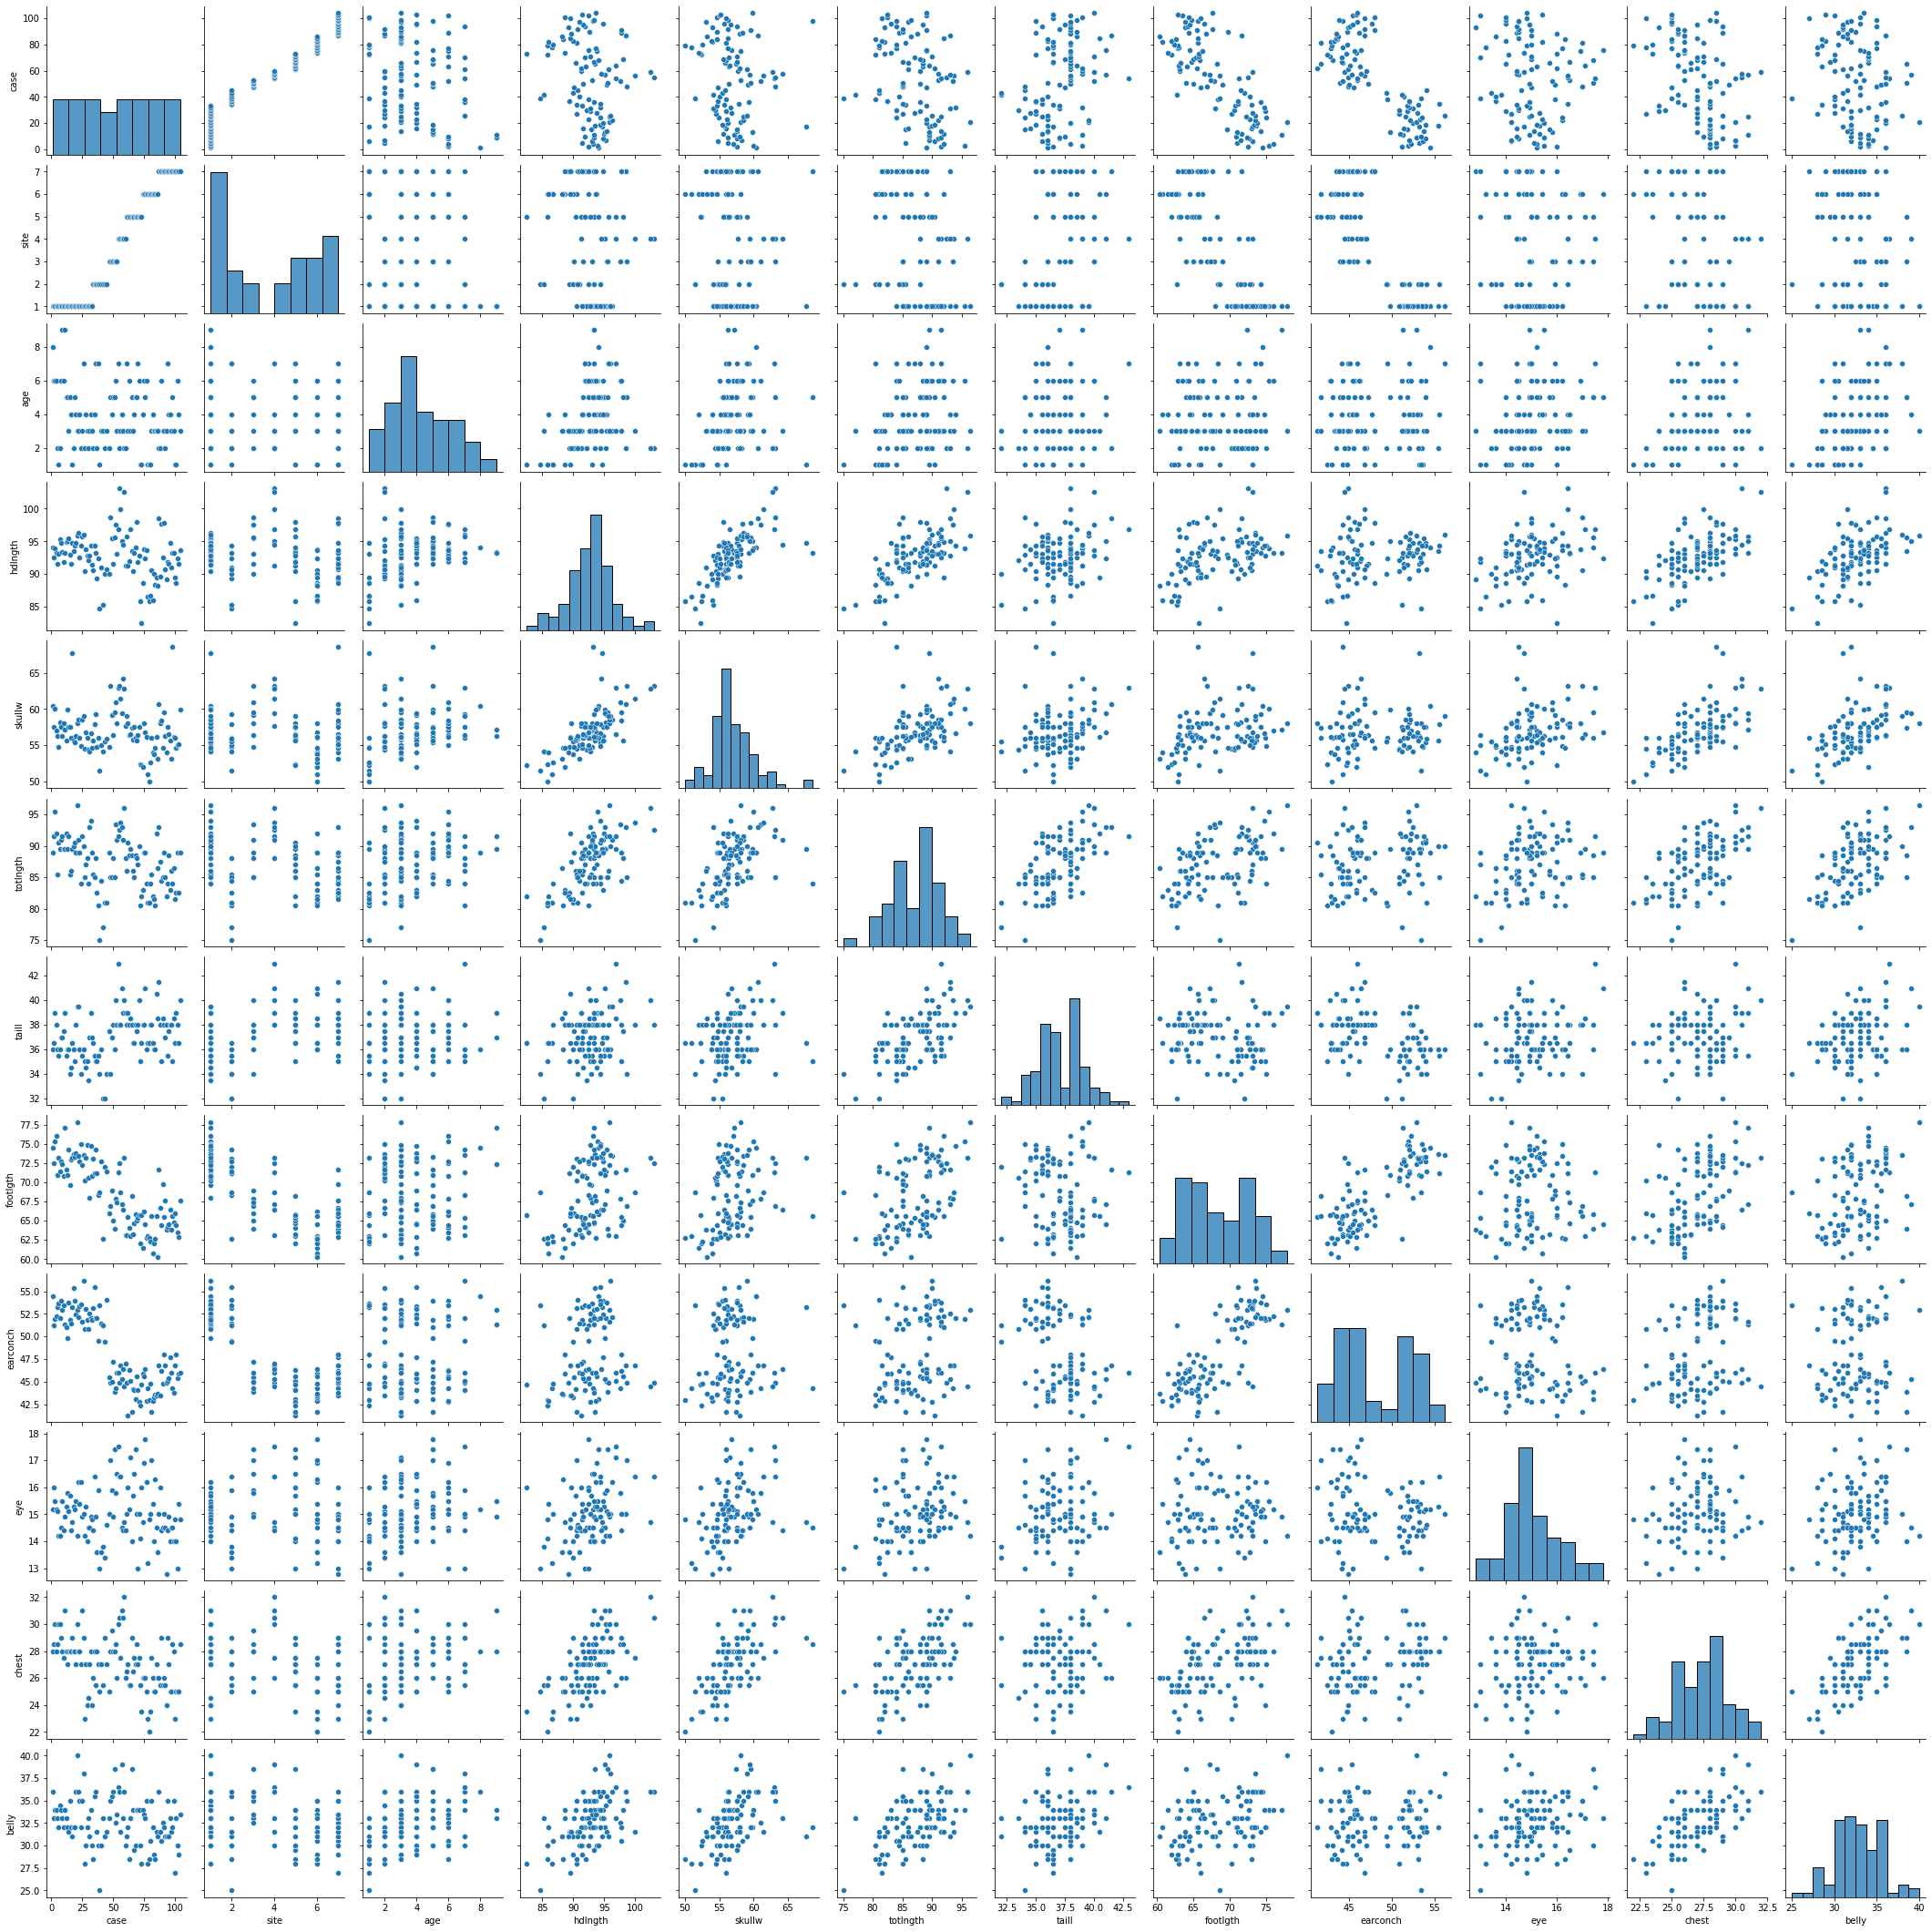

In [191]:
# Show all the correlation between the features and the target
import seaborn as sns

sns.pairplot(df)

In [207]:
# I pick these features as x and y
X = df[['hdlngth', 'skullw']]
y = df[['totlngth']]

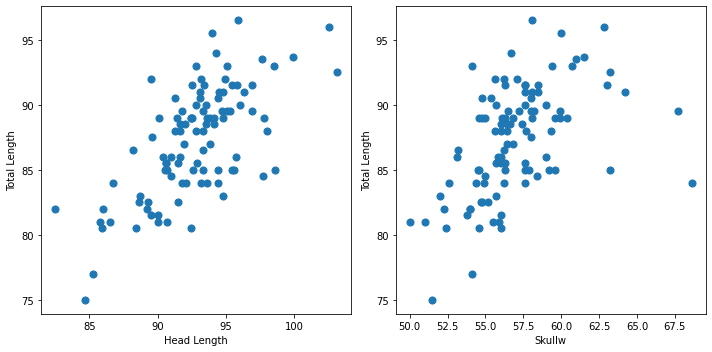

In [208]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.subplot(121)
plt.scatter(X['hdlngth'], y, s=50, marker='o')
plt.xlabel('Head Length')
plt.ylabel('Total Length')
plt.subplot(122)
plt.scatter(X['skullw'], y, s=50, marker='o')
plt.xlabel('Skullw')
plt.ylabel('Total Length')
plt.show()

In [209]:
X = X.to_numpy()
y = y.to_numpy()

In [210]:
from numpy.ma.core import shape
import numpy as np

def featureNormalize(X):
  X_norm = X
  mu = np.zeros((1, 2), dtype=int)
  sigma = np.zeros((1, 2), dtype=int)

  mu = np.mean(X)
  sigma = np.std(X)

  for i in range(np.size(X, 1)):
    pnyb = X[:, i] - np.mean(X[:, i])
    X_norm[:,i] = pnyb / np.std(X[:,i])

  return mu, sigma, X_norm

mu, sigma, X_norm = featureNormalize(X)
shape(X_norm)

(101, 2)

In [211]:
oness = np.ones((len(y), 1))
X_ones = np.append(oness, X_norm, axis=1)

In [212]:
alpha = 0.01;
num_iters = 500;
# theta = np.zeros((3, 1))
theta = np.array([[89], [27], [4]])
theta

array([[89],
       [27],
       [ 4]])

In [213]:
def computeCost(X, y, theta):
  m = len(y)
  predict = np.dot(X, theta)
  sqrErr = np.square(predict - y)
  sm = np.sum(sqrErr, axis=0)
  j = (1/(2*m)) * sm
  return j

In [214]:
def gradienDescentMulti(X, y, theta, alpha, num_iters):
  m = len(y)
  j_history = []
  for i in range(num_iters):
    pred = np.dot(X, theta)
    sqrE = pred - y
    sqrE_t = sqrE.T
    mult_x = np.dot(sqrE_t, X)
    mult_pm = np.divide(mult_x, m)
    mult_pm_t = mult_pm.T
    theta = theta - (np.dot(alpha, mult_pm_t))
    # print(theta)
    th = computeCost(X, y, theta)
    j_history.append(th)
  return theta, j_history

In [215]:
theta, j_history = gradienDescentMulti(X_ones, y, theta, alpha, num_iters)
theta

array([[87.28067842],
       [ 4.97749033],
       [-2.09161101]])

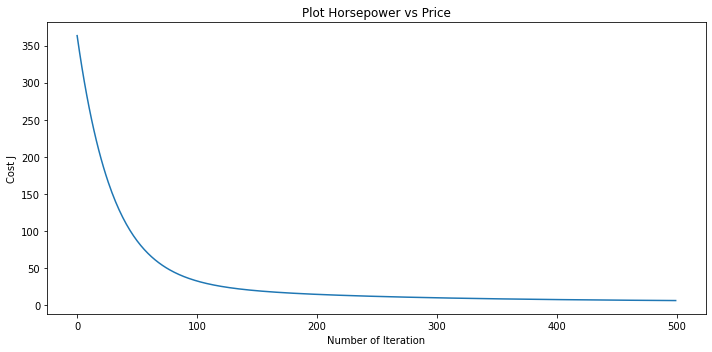

In [216]:
X = list(range(len(j_history)))
plt.plot(X, j_history)
plt.xlabel('Number of Iteration')
plt.ylabel('Cost J')
plt.title('Plot Horsepower vs Price')
plt.show()

In [217]:
X = df[['hdlngth', 'skullw']]
y = df[['totlngth']]
X = X.to_numpy()
# X_norm = featureNormalize(X)
y = y.to_numpy()
# oness = np.ones((len(y), 1))
# X = np.append(oness, X_norm, axis=1)

In [220]:
theta_a = float(theta[0])
theta_b = float(theta[1])
theta_c = float(theta[2])

y_pred = np.dot(X_ones, theta)
y_pred


array([[86.89702127],
       [86.51939063],
       [87.02585527],
       [87.85327939],
       [85.97849965],
       [89.26935001],
       [90.09346397],
       [89.78914383],
       [88.67960012],
       [85.25325117],
       [87.92769328],
       [91.28629293],
       [88.65739958],
       [90.64212293],
       [87.08804336],
       [86.32391072],
       [82.80430178],
       [89.22825908],
       [90.71097561],
       [90.66988468],
       [91.01419236],
       [91.31184791],
       [87.53563007],
       [91.04972209],
       [90.601032  ],
       [90.54661188],
       [85.77635515],
       [88.90950637],
       [88.02986891],
       [88.11871537],
       [89.31710553],
       [89.68807158],
       [86.9880745 ],
       [85.10552678],
       [89.01724321],
       [86.50495807],
       [83.86714907],
       [87.46121618],
       [79.56336943],
       [86.14842458],
       [78.65486684],
       [84.38804628],
       [85.11219137],
       [85.00445453],
       [91.39738421],
       [89

<h1>✨ Simple Multiple Linear Regression Sklearn ✨</h1> 

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/possum.csv')

print("Before Cleaning :", data.isnull().values.any())
df =data.dropna()
X = df[['hdlngth', 'skullw']]
y = df[['totlngth']]
print("After Cleaning :", df.isnull().values.any())

X = df[['hdlngth', 'skullw']].values.reshape(-1,2)
y = df['hdlngth'].values.reshape(-1,1)

Before Cleaning : True
After Cleaning : False


In [205]:
mu, sigma, X_norm = featureNormalize(X)
print(X_norm)
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[ 0.39109073  1.11412086]
 [-0.06588875  0.20717389]
 [ 0.36252951  0.98455701]
 [ 0.13403977  0.04521907]
 [-0.35150092 -0.21390864]
 [ 0.10547855 -0.69977309]
 [ 0.73382533  0.40151967]
 [ 0.59101925  0.20717389]
 [ 0.19116221 -0.21390864]
 [-0.26581727  0.33673774]
 [ 0.16260099  0.07761003]
 [ 0.61958047 -0.44064538]
 [ 0.6767029   0.95216604]
 [ 0.76238655  0.20717389]
 [ 0.04835612  0.20717389]
 [-0.3229397  -0.31108153]
 [ 0.56245803  3.4786612 ]
 [ 0.21972342 -0.40825442]
 [ 0.47677438 -0.50542731]
 [ 0.59101925 -0.21390864]
 [ 0.90519264  0.3691287 ]
 [ 1.01943751  0.49869256]
 [-0.06588875 -0.27869057]
 [ 0.47677438 -0.66738213]
 [ 0.87663142  0.49869256]
 [ 0.93375385  0.66064737]
 [-0.63711309 -0.79694598]
 [ 0.30540708 -0.05195382]
 [ 0.0197949  -0.31108153]
 [-0.18013362 -0.82933695]
 [ 0.0197949  -0.92650984]
 [ 0.44821316 -0.08434479]
 [-0.38006214 -0.76455502]
 [-0.60855188 -0.40825442]
 [ 0.47677438  0.30434678]
 [ 0.16260099  0.75782026]
 [-0.9798477  -0.69977309]
 

In [221]:
y_prediksi = lin_reg.predict(X_norm)
print(y_prediksi)

[[ 94.1]
 [ 92.5]
 [ 94. ]
 [ 93.2]
 [ 91.5]
 [ 93.1]
 [ 95.3]
 [ 94.8]
 [ 93.4]
 [ 91.8]
 [ 93.3]
 [ 94.9]
 [ 95.1]
 [ 95.4]
 [ 92.9]
 [ 91.6]
 [ 94.7]
 [ 93.5]
 [ 94.4]
 [ 94.8]
 [ 95.9]
 [ 96.3]
 [ 92.5]
 [ 94.4]
 [ 95.8]
 [ 96. ]
 [ 90.5]
 [ 93.8]
 [ 92.8]
 [ 92.1]
 [ 92.8]
 [ 94.3]
 [ 91.4]
 [ 90.6]
 [ 94.4]
 [ 93.3]
 [ 89.3]
 [ 92.4]
 [ 84.7]
 [ 91. ]
 [ 85.3]
 [ 90. ]
 [ 90.7]
 [ 90.1]
 [ 98.6]
 [ 95.4]
 [ 91.6]
 [ 95.6]
 [ 97.6]
 [ 93.1]
 [ 96.9]
 [103.1]
 [ 99.9]
 [ 95.1]
 [ 94.5]
 [102.5]
 [ 91.3]
 [ 95.7]
 [ 91.3]
 [ 92. ]
 [ 96.9]
 [ 93.5]
 [ 90.4]
 [ 93.3]
 [ 94.1]
 [ 98. ]
 [ 91.9]
 [ 92.8]
 [ 85.9]
 [ 82.5]
 [ 88.7]
 [ 93.8]
 [ 92.4]
 [ 93.6]
 [ 86.5]
 [ 85.8]
 [ 86.7]
 [ 90.6]
 [ 86. ]
 [ 90. ]
 [ 88.4]
 [ 89.5]
 [ 88.2]
 [ 98.5]
 [ 89.6]
 [ 97.7]
 [ 92.6]
 [ 97.8]
 [ 90.7]
 [ 89.2]
 [ 91.8]
 [ 91.6]
 [ 94.8]
 [ 91. ]
 [ 93.2]
 [ 93.3]
 [ 89.5]
 [ 88.6]
 [ 92.4]
 [ 91.5]
 [ 93.6]]
